### Q4: Comparing classifiers: Divorce classification/prediction

#### Part 1

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [8]:
data = pd.read_csv('marriage.csv', header=None)
data.rename(columns={54: 'y'}, inplace=True)

X = data.iloc[:, 0:54]
y = data.iloc[:, 54]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4264)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(len(y_train)).astype(int)
y_test = np.array(y_test).reshape(len(y_test)).astype(int)

In [9]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=200, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_train_acc = lr_model.score(X_train, y_train)
lr_test_acc = lr_model.score(X_test, y_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)

# Naïve Bayes
naive_bayes = GaussianNB(var_smoothing=0.001)
naive_bayes.fit(X_train, y_train)
nb_train_acc = naive_bayes.score(X_train, y_train)
nb_test_acc = naive_bayes.score(X_test, y_test)

print(f'Logistic Regression - Training Accuracy: {lr_train_acc:.6f}, Test Accuracy: {lr_test_acc:.6f}')
print(f'KNN (k=5) - Training Accuracy: {knn_train_acc:.6f}, Test Accuracy: {knn_test_acc:.6f}')
print(f'Naïve Bayes - Training Accuracy: {nb_train_acc:.6f}, Test Accuracy: {nb_test_acc:.6f}')


Logistic Regression - Training Accuracy: 1.000000, Test Accuracy: 0.941176
KNN (k=5) - Training Accuracy: 0.977941, Test Accuracy: 0.970588
Naïve Bayes - Training Accuracy: 0.977941, Test Accuracy: 0.970588


#### Part B

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

Logistic Regression (PCA) - Training Accuracy: 0.9779, Test Accuracy: 0.9706
KNN (PCA, k=5) - Training Accuracy: 0.9853, Test Accuracy: 0.9706
Naïve Bayes (PCA) - Training Accuracy: 0.9779, Test Accuracy: 0.9706


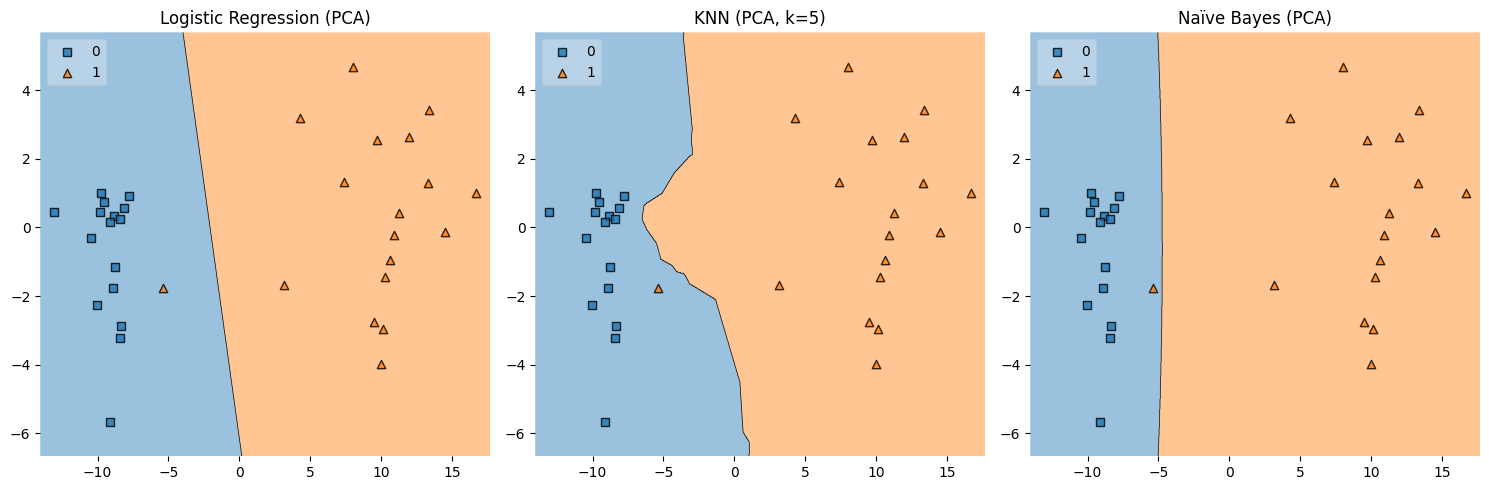

In [19]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=4264)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(len(y_train)).astype(int)
y_test = np.array(y_test).reshape(len(y_test)).astype(int)

lr_model = LogisticRegression(max_iter=200, solver='liblinear').fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
naive_bayes = GaussianNB().fit(X_train, y_train)

lr_train_acc = lr_model.score(X_train, y_train)
lr_test_acc = lr_model.score(X_test, y_test)

knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)

nb_train_acc = naive_bayes.score(X_train, y_train)
nb_test_acc = naive_bayes.score(X_test, y_test)

print(f'Logistic Regression (PCA) - Training Accuracy: {lr_train_acc:.4f}, Test Accuracy: {lr_test_acc:.4f}')
print(f'KNN (PCA, k=5) - Training Accuracy: {knn_train_acc:.4f}, Test Accuracy: {knn_test_acc:.4f}')
print(f'Naïve Bayes (PCA) - Training Accuracy: {nb_train_acc:.4f}, Test Accuracy: {nb_test_acc:.4f}')

assert X_test.shape[1] == 2, "Error: X_test must be 2D for plot_decision_regions"

gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(15, 5))

ax = plt.subplot(gs[0, 0])
plot_decision_regions(X_test, y_test, clf=lr_model, legend=2)
plt.title('Logistic Regression (PCA)')

ax = plt.subplot(gs[0, 1])
plot_decision_regions(X_test, y_test, clf=knn, legend=2)
plt.title('KNN (PCA, k=5)')

ax = plt.subplot(gs[0, 2])
plot_decision_regions(X_test, y_test, clf=naive_bayes, legend=2)
plt.title('Naïve Bayes (PCA)')

plt.tight_layout()
plt.show()
